Problem statement: Book Rent is the largest online and offline book rental chain in India. They provide books of various genres, such as thrillers, mysteries, romances, and science fiction. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base. The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit. 
Project Objective:
Focus on improving the user experience by personalizing it to the user's needs. You have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. This will ensure that users are renting the books based on their tastes and traits.


### EDA and Visualization

In [77]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.impute import SimpleImputer
%matplotlib inline

In [78]:
# Raw data load
dfusers = pd.read_csv("BX-Users.csv",encoding='ANSI',low_memory=False)


In [79]:
dfbooks = pd.read_csv("BX-Books.csv",encoding='ANSI',low_memory=False)


In [80]:
dfratings = pd.read_csv("BX-Book-Ratings.csv",encoding='ANSI',low_memory=False)

## Users EDA

In [81]:
dfusers.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [82]:
dfusers.tail()

,user_id,Location,Age
278854,278854,"portland, oregon, usa",NaN
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",NaN
278857,278857,"knoxville, tennessee, usa",NaN
278858,278858,"dublin, n/a, ireland",NaN


In [83]:
dfusers.shape

(278859, 3)

In [84]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [85]:
dfusers.isna().any()

user_id     False
Location     True
Age          True
dtype: bool

In [86]:
# Impute missing values for Age Column
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(dfusers[['Age']])
dfusers['Age'] = imputer.transform(dfusers[['Age']])
dfusers['Age'] = dfusers['Age'].round()
dfusers.isna().any()

user_id     False
Location     True
Age         False
dtype: bool

In [87]:
dfusers[dfusers['Location'].isna()]

,user_id,Location,Age
275081,", milan, italy""",NaN,35.0


In [88]:
dfusers = dfusers.drop(275081,0)

C:\Users\harceroj\AppData\Local\Temp\ipykernel_29476\3491121992.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfusers = dfusers.drop(275081,0)


In [89]:
# Split Location
#dfusers['Location'].str.split(',', n=3, expand=True)
dfusers[['City','State','Country']] = dfusers['Location'].str.split(',', n=2, expand=True)
dfusers['State'] = dfusers['State'].str.strip()
dfusers['Country'] = dfusers['Country'].str.strip()
dfusers.head()

,user_id,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united kingdom


In [90]:
dfusers = dfusers.drop(['Location'],axis=1)

In [91]:
dfusers['State'].unique()

array(['new york', 'california', 'yukon territory', ..., 'co.donegal',
       '±±¾©', 'denbighshire county'], dtype=object)

In [92]:
dfusers.head()

,user_id,Age,City,State,Country
0,1,35.0,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,35.0,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,35.0,farnborough,hants,united kingdom


In [93]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278858
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  278858 non-null  object 
 1   Age      278858 non-null  float64
 2   City     278858 non-null  object 
 3   State    278855 non-null  object 
 4   Country  278854 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.8+ MB


In [94]:
dfusers['user_id'].unique()

array(['1', '2', '3', ..., '278856', '278857', '278858'], dtype=object)

In [95]:
dfusers['user_id'] = pd.to_numeric(dfusers['user_id'],errors='coerce')

In [96]:
dfusers.isna().sum()

user_id    0
Age        0
City       0
State      3
Country    4
dtype: int64

In [97]:
dfusers['user_id'] = dfusers['user_id'].fillna(278859)

In [98]:
dfusers[dfusers['Country'].isna()]

,user_id,Age,City,State,Country
29419,29420,68.0,st. louis,missouri,None
44405,44406,27.0,#NAME?,None,None
134376,134377,30.0,lawrenceville,None,None
275080,275081,35.0,cernusco s,None,None


In [99]:
dfusers.at[29419,'Country'] ='usa'
dfusers.at[275080,'Country'] ='italy'
dfusers.at[275080,'State'] ='lombardia'
dfusers.at[134376,'Country'] ='usa'
dfusers.at[134376,'State'] ='georgia'

In [100]:
le = preprocessing.LabelEncoder()
le.fit(dfusers['City'])
dfusers['City_cd'] = le.transform(dfusers['City'])

le.fit(dfusers['State'])
dfusers['State_cd'] = le.transform(dfusers['State'])

le.fit(dfusers['Country'])
dfusers['Country_cd'] = le.transform(dfusers['Country'])

In [101]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278858
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     278858 non-null  int64  
 1   Age         278858 non-null  float64
 2   City        278858 non-null  object 
 3   State       278857 non-null  object 
 4   Country     278857 non-null  object 
 5   City_cd     278858 non-null  int32  
 6   State_cd    278858 non-null  int32  
 7   Country_cd  278858 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 24.0+ MB


### EDA Books

In [102]:
dfbooks.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [103]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [104]:
dfbooks.shape

(271379, 5)

In [105]:
dfbooks.isnull().sum() 

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [106]:
dfbooks.dropna(axis=0, inplace=True)

In [107]:
dfbooks["year_of_publication"] = pd.to_numeric(dfbooks['isbn'],errors='coerce')

In [108]:
le = preprocessing.LabelEncoder()
le.fit(dfbooks['publisher'])
dfbooks['publisher_cd'] = le.transform(dfbooks['publisher'])

le.fit(dfbooks['book_author'])
dfbooks['book_author_cd'] = le.transform(dfbooks['book_author'])

le.fit(dfbooks['book_title'])
dfbooks['book_title_cd'] = le.transform(dfbooks['book_title'])

le.fit(dfbooks['isbn'])
dfbooks['isbn_cd'] = le.transform(dfbooks['isbn'])


In [109]:
dfbooks[pd.to_numeric(dfbooks['isbn'],errors='coerce').isna()]['isbn'].unique()

array(['074322678X', '080652121X', '038078243X', ..., '020130998X',
       '014002803X', '006008667X'], dtype=object)

In [110]:
#def convISBN(x):
 #   return int(''.join(c for c in x if c.isdigit()))
    #if x[-1]=='X' or x[-1]=='x':
    #     int(x[:-1])
    #else:
    #     int(x) 

#dfbooks['isbn'].apply(lambda x:convISBN(x))

In [111]:
dfbooks.sort_values(by='isbn_cd', ascending=True)

,isbn,book_title,book_author,year_of_publication,publisher,publisher_cd,book_author_cd,book_title_cd,isbn_cd
42605,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,NaN,HarperCollins Publishers,6665,93743,171676,0
51435,000104799X,Monk's-hood,Ellis Peters,NaN,HarperCollins Publishers,6665,27854,122931,1
134866,000123207X,Paddington's Birthday Party,Michael Bond,NaN,HarperCollins Publishers,6665,68426,137635,2
244117,000160418X,The Clue in the Crumbling Wall,Carolyn Keene,NaN,HarperCollins Publishers,6665,13516,182298,3
52286,000171421X,It's Not Easy Being a Bunny (A Beginner Book),Marilyn Sadler,NaN,HarperCollins Publishers,6665,64528,95101,4
...,...,...,...,...,...,...,...,...,...
72808,B000234N76,Falling Angels,Tracy Chevalier,NaN,E P Dutton,4454,96838,64484,271371
193540,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,NaN,Knopf,8246,45667,94952,271372
131093,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,NaN,Viking Adult,15704,27122,76683,271373
179433,B0002JV9PY,The Blockade Runners,Jules Verne,NaN,Digireads.com,4108,52365,179113,271374


In [112]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271376 entries, 0 to 271378
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 271376 non-null  object 
 1   book_title           271376 non-null  object 
 2   book_author          271376 non-null  object 
 3   year_of_publication  249039 non-null  float64
 4   publisher            271376 non-null  object 
 5   publisher_cd         271376 non-null  int32  
 6   book_author_cd       271376 non-null  int32  
 7   book_title_cd        271376 non-null  int32  
 8   isbn_cd              271376 non-null  int32  
dtypes: float64(1), int32(4), object(4)
memory usage: 16.6+ MB


### EDA Ratings     HERE

In [113]:
dfratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [114]:
dfratings.shape

(1048575, 3)

In [115]:
dfratings.isnull().sum() 

user_id    0
isbn       0
rating     0
dtype: int64

In [116]:
dfratings['user_id'] = pd.to_numeric(dfratings['user_id'],errors='coerce')

In [117]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [118]:
dfratings.agg(['count', 'size', 'nunique'])

,user_id,isbn,rating
count,1048575,1048575,1048575
size,1048575,1048575,1048575
nunique,95513,322102,11


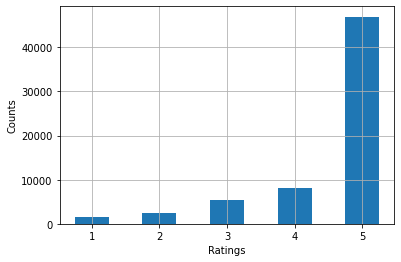

In [119]:
plt.hist(dfratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5);
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [120]:
number_reader_ratings=dfratings.groupby('user_id')['rating'].count().sort_values(ascending=False)
number_reader_ratings

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
123225        1
123227        1
123240        1
123241        1
2             1
Name: rating, Length: 95513, dtype: int64

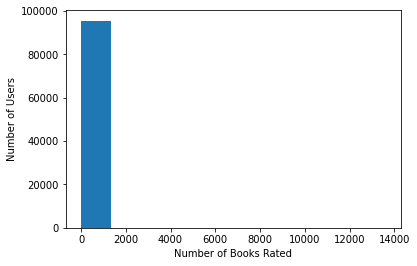

In [121]:
plt.hist(number_reader_ratings);
plt.xlabel('Number of Books Rated')
plt.ylabel('Number of Users')
plt.show()

In [122]:
number_book_ratings=dfratings.groupby('isbn')['rating'].count().sort_values(ascending=False)
number_book_ratings

isbn
971880107     2264
316666343     1164
385504209      813
312195516      668
60928336       662
              ... 
3815820782       1
3815860032       1
3815860121       1
3816600603       1
º423350229       1
Name: rating, Length: 322102, dtype: int64

In [123]:
def best_rated (df_ratings, top=100):
    top_number=list(df_ratings.groupby('isbn')['rating'].count().sort_values(ascending=False)[:top].index)
    
    return top_number

In [124]:
def most_rated (df_ratings, top=100):
    top_mean=list(df_ratings.groupby(['isbn']).mean().sort_values('rating',ascending=False)[:top].index)
    
    return top_mean

In [125]:
#book_id for interest

most_rated_list = most_rated (dfratings, top=100)
best_rated_list = best_rated (dfratings, top=100)

In [126]:
print(most_rated_list)

['689851022', '1884718051', '8481304352', '385073496', '345462831', '1567996981', '836267583', '771075170', '1567996353', '1567996329', '399133275', '70049238', '373691912', '967240832', '743508149', '312990960', '805041257', '1567997082', '771074719', '156799721X', '385086016', '068971260X', '836262093', '713448571', '553231111', '967168333', '068950408X', '1567997856', '068911947X', '1567997848', '068931194X', '1567997708', '751308005', '1567997465', '1567997457', '836267869', '70051429', '385059469', '1583450084', '700603808', '385048106', '1567992013', '3442072697', '6.67E+12', '932255035', '8475098150', '671722220', '385040199', '700606114', '330397931', '1567991688', '068812920X', '967303540', '2290333263', '718143493', '85.326.00220', '88044208200', '385058489', '967260329', '068815963X', '743507843', '736410023', '877423555', '1884731112', '805039392', '312991347', '158333095X', '6.11E+12', '399134891', '898656354', '3502623643', '509623966', '590476157', '1404304606', '4493003

In [127]:
print(best_rated_list)

['971880107', '316666343', '385504209', '312195516', '60928336', '044023722X', '679781587', '142001740', '067976402X', '671027360', '446672211', '316601950', '059035342X', '375727345', '044021145X', '452282152', '440214041', '804106304', '440211727', '60930535', '345337662', '440226430', '743418174', '671021001', '312278586', '345370775', '440241073', '156027321', '9.78E+12', '446605239', '671003755', '60976845', '1400034779', '786868716', '440222656', '440234743', '345361792', '345417623', '440221471', '440236673', '316769487', '446610038', '044022165X', '446310786', '385484518', '375706771', '60502258', '440220602', '140293248', '440225701', '446606812', '044651652X', '345353145', '345443284', '312291639', '440213525', '006101351X', '316284955', '375707972', '671510053', '439064872', '440206154', '60934417', '316776963', '452282829', '385335482', '385492081', '440224764', '043935806X', '068484477X', '375726403', '385265700', '684872153', '385720106', '345342968', '375700757', '609871

In [128]:
n_ratings = len(dfratings)
n_movies = len(dfratings['isbn'].unique())
n_users = len(dfratings['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique isbn's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average dfratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average dfratings per movie: {round(n_ratings/n_movies, 2)}")

user_freq = dfratings[['user_id', 'isbn']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'n_dfratings']
user_freq.head()


Number of ratings: 1048575
Number of unique isbn's: 322102
Number of unique users: 95513
Average dfratings per user: 10.98
Average dfratings per movie: 3.26


,user_id,n_dfratings
0,2,1
1,7,1
2,8,18
3,9,3
4,10,2


In [129]:
from scipy.sparse import csr_matrix

def create_matrix(df):
	N = len(df['user_id'].unique())
	M = len(df['isbn'].unique())
	
	# Map Ids to indices
	user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
	book_mapper = dict(zip(np.unique(df["isbn"]), list(range(M))))
	
	# Map indices to IDs
	user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
	book_inv_mapper = dict(zip(list(range(M)), np.unique(df["isbn"])))
	
	user_index = [user_mapper[i] for i in df['user_id']]
	book_index = [book_mapper[i] for i in df['isbn']]

	X = csr_matrix((df["rating"], (book_index, user_index)), shape=(M, N))
	
	return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(dfratings)

In [130]:
book_mapper

{' 904492401X': 0,
 '#069580216X': 1,
 '#6612432': 2,
 '(THEWINDMILLP': 3,
 ')416195113': 4,
 ')440206529': 5,
 ')452273056': 6,
 ')553267833': 7,
 ')959326839': 8,
 '*0452281903': 9,
 '*0515128325': 10,
 ',.0330486187': 11,
 '/8741060773': 12,
 '0': 13,
 '0 00 612183 7': 14,
 '0 00 614494 2': 15,
 '0 00 655241 2': 16,
 '0 09 944678 2': 17,
 '0 14 02.9640': 18,
 '0 297 64548 X': 19,
 '0 330 10597 3': 20,
 '0 440 20615 4': 21,
 '0 586 05153 8': 22,
 '0 671 74251 5': 23,
 '0 7322 6794 3': 24,
 '0 7336 1053 6': 25,
 '0 7475 3274 5': 26,
 '0 7515 0976 0': 27,
 '0 75280 122 8': 28,
 '0 85550 000 x': 29,
 '0 907 062 008': 30,
 '0*449002632': 31,
 '0*553*072412': 32,
 '0*708880258': 33,
 '0+399139745': 34,
 '0-517-18725-6': 35,
 '0.15.602732.1': 36,
 '0.330241664': 37,
 '0.380.44099.7': 38,
 '0.380.50377.8': 39,
 '0.473.087979': 40,
 '0.55339': 41,
 '0.70028': 42,
 '0/330/25864/8': 43,
 '0/385/42473/6': 44,
 '00 14 02 5314': 45,
 '000003827X': 46,
 '0000225820X': 47,
 '000104687X': 48,
 '0001

In [131]:
from sklearn.neighbors import NearestNeighbors
def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
	
	neighbour_ids = []
	
	book_ind = book_mapper[book_id]
	book_vec = X[book_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	book_vec = book_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(book_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids

In [132]:
#https://www.geeksforgeeks.org/recommendation-system-in-python/

In [133]:
from sklearn.neighbors import NearestNeighbors
def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
	neighbour_ids = []
	
	book_ind = book_mapper[book_id]
	book_vec = X[book_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	book_vec = book_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(book_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids

In [134]:
book_titles = dict(zip(dfbooks['isbn'], dfbooks['book_title']))
book_titles

{'195153448': 'Classical Mythology',
 '2005018': 'Clara Callan',
 '60973129': 'Decision in Normandy',
 '374157065': 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
 '393045218': 'The Mummies of Urumchi',
 '399135782': "The Kitchen God's Wife",
 '425176428': "What If?: The World's Foremost Military Historians Imagine What Might Have Been",
 '671870432': 'PLEADING GUILTY',
 '679425608': 'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
 '074322678X': "Where You'll Find Me: And Other Stories",
 '771074670': 'Nights Below Station Street',
 '080652121X': "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust",
 '887841740': 'The Middle Stories',
 '1552041778': 'Jane Doe',
 '1558746218': "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
 '1567407781': 'The Witchfinder (Amos Walker Mystery Series)',
 '1575663937': 'More Cunning Than Man: A Social History of Ra

In [135]:
book_id = '590514776'

similar_ids = find_similar_books(book_id, X, k=5)
book_title = book_titles[book_id]
similar_ids

['553566997', '553567012', '671746510', '553567020', '425138410']

In [136]:
print(f"Since you watched {book_title}")
for i in similar_ids:
	print(book_titles[i])

Since you watched Meet the Stars of Buffy the Vampire Slayer
Billie's Secret (Sweet Valley University, No 18)
Broken Promises, Shattered Dreams (Sweet Valley University, No 19)
HAUNTED (FEAR STREET 8) : HAUNTED (Fear Street)
Here Comes the Bride (Sweet Valley University (Paperback))
Sixteen Candles (Terror Academy Book No.3)


### Merge data frames

In [163]:
dfall = pd.merge(dfratings[5000:], dfbooks, how='inner', on = 'isbn')
#dfall = pd.merge(dfall, dfusers, how='inner', on = 'user_id')
dfall

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,publisher_cd,book_author_cd,book_title_cd,isbn_cd
0,278418,345318617,7,The Remaking of Sigmund Freud,Barry Malzberg,345318617.0,Del Rey Books,3928,7974,205422,86978
1,278418,345318854,0,With a Tangled Skein (Incarnations of Immortal...,PIERS ANTHONY,345318854.0,Del Rey,3927,74498,237712,87014
2,11676,345318854,2,With a Tangled Skein (Incarnations of Immortal...,PIERS ANTHONY,345318854.0,Del Rey,3927,74498,237712,87014
3,11855,345318854,0,With a Tangled Skein (Incarnations of Immortal...,PIERS ANTHONY,345318854.0,Del Rey,3927,74498,237712,87014
4,19085,345318854,8,With a Tangled Skein (Incarnations of Immortal...,PIERS ANTHONY,345318854.0,Del Rey,3927,74498,237712,87014
...,...,...,...,...,...,...,...,...,...,...,...
936713,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,440106575.0,Dell,3946,41141,79327,131578
936714,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,451157516.0,New Amer Library (Mm),10341,438,34231,144657
936715,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,NaN,Dover Publications,4335,96463,75290,8277
936716,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,486256588.0,Dover Publications,4335,96463,156043,151627


In [154]:
dfall.columns

Index(['user_id', 'isbn', 'rating', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'publisher_cd', 'book_author_cd',
       'book_title_cd', 'isbn_cd', 'Age', 'City', 'State', 'Country',
       'City_cd', 'State_cd', 'Country_cd'],
      dtype='object')

In [139]:
print(dfall.head())
print(dfall.tail())

   user_id        isbn  rating  \
0   276725  034545104X       0   
1     2313  034545104X       5   
2     2313   812533550       9   
3     2313   679745580       8   
4     2313    60173289       9   

                                         book_title       book_author  \
0                              Flesh Tones: A Novel        M. J. Rose   
1                              Flesh Tones: A Novel        M. J. Rose   
2     Ender's Game (Ender Wiggins Saga (Paperback))  Orson Scott Card   
3             In Cold Blood (Vintage International)     TRUMAN CAPOTE   
4  Divine Secrets of the Ya-Ya Sisterhood : A Novel     Rebecca Wells   

   year_of_publication         publisher  publisher_cd  book_author_cd  \
0                  NaN  Ballantine Books          1405           61972   
1                  NaN  Ballantine Books          1405           61972   
2          812533550.0         Tor Books         14980           74005   
3          679745580.0           Vintage         15730      

In [140]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941145 entries, 0 to 941144
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              941145 non-null  int64  
 1   isbn                 941145 non-null  object 
 2   rating               941145 non-null  int64  
 3   book_title           941145 non-null  object 
 4   book_author          941145 non-null  object 
 5   year_of_publication  863255 non-null  float64
 6   publisher            941145 non-null  object 
 7   publisher_cd         941145 non-null  int32  
 8   book_author_cd       941145 non-null  int32  
 9   book_title_cd        941145 non-null  int32  
 10  isbn_cd              941145 non-null  int32  
 11  Age                  941145 non-null  float64
 12  City                 941145 non-null  object 
 13  State                941145 non-null  object 
 14  Country              941145 non-null  object 
 15  City_cd          

In [160]:
dfall.shape

(936718, 18)

In [155]:
dfall = dfall.drop(['isbn','City','State','Country','book_title','book_author','publisher'],axis=1)

In [156]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929837 entries, 0 to 929836
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              929837 non-null  int64  
 1   rating               929837 non-null  int64  
 2   year_of_publication  852592 non-null  float64
 3   publisher_cd         929837 non-null  int32  
 4   book_author_cd       929837 non-null  int32  
 5   book_title_cd        929837 non-null  int32  
 6   isbn_cd              929837 non-null  int32  
 7   Age                  929837 non-null  float64
 8   City_cd              929837 non-null  int32  
 9   State_cd             929837 non-null  int32  
 10  Country_cd           929837 non-null  int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 60.3 MB


In [146]:
# TODO

used_features =[
    'user_id', 'rating', 'publisher_cd', 'book_author_cd', 'Age','City_cd','State_cd','Country_cd'
]


# Split your data into training and validation sets
from sklearn.model_selection import train_test_split # TTS !!!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)
X_train.shape, X_test.shape

((257681, 95513), (64421, 95513))

In [161]:
book_ratings = dfall.pivot_table(index=['user_id'],columns=['isbn_cd'],values='rating')

c:\Users\harceroj\Miniconda3\lib\site-packages\pandas\core\reshape\reshape.py:130: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [ ]:
dfratings.shape